## I'm look forward to your high evaluation.
## If you have any suggestions for improvement, please comment!

#### This dataset is about bicycle rentals in Seoul with **8760 rows and 14 columns**.
#### This time, set the objective function to <font color="Red">**Rented Bike Count**</font>.

##### Example
|Feature|example|D-type|Null-Count|
|----|----|----|----|
|Date|01/12/2017|object|0|
|Rented Bike Count|254|int64|0|
|Hour|0|int64|0|
|Temperature(°C)|-5.2|float64|0|
|Humidity(%)|37|int64|0|
|Wind speed (m/s)|2.2|float64|0|
|Visibility (10m)|2000|int64|0|
|Dew point temperature(°C)|-17.6|float64|0|
|Solar Radiation (MJ/m2)|0.0|float64|0|
|Rainfall(mm)|0.0|float64|0|
|Snowfall (cm)|0.0|float64|0|
|Seasons|Winter|object|0|
|Holiday|No Holiday|object|0|
|Functioning Day|Yes|object|0|

> #### my data set is based on bike sharing in Korea developing its mobility movement in all areas of the country where it is possible to walk and all the people who can and should ride share bikes in the open because there are proposals that the companies themselves deliver to the people

### https://www.kaggle.com/datasets/willianoliveiragibin/bike-seoul-sharing/data

In [41]:
# Libraries required for visualization and data processing

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


# to display all columns
pd.set_option("display.max_columns",None)

In [42]:
TARGET = "Rented Bike Count"

# Data Loading

In [43]:
df = pd.read_csv("/kaggle/input/bike-seoul-sharing/SeoulBikeData.csv",encoding='ISO-8859-1')
print(df.shape)
df.head(3)

(8760, 14)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


# Data details

In [44]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [46]:
df.isnull().sum().sum()

0

In [47]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [48]:
print(f"min date : {df['Date'].min()}")
print(f"max date : {df['Date'].max()}")

min date : 2017-12-01 00:00:00
max date : 2018-11-30 00:00:00


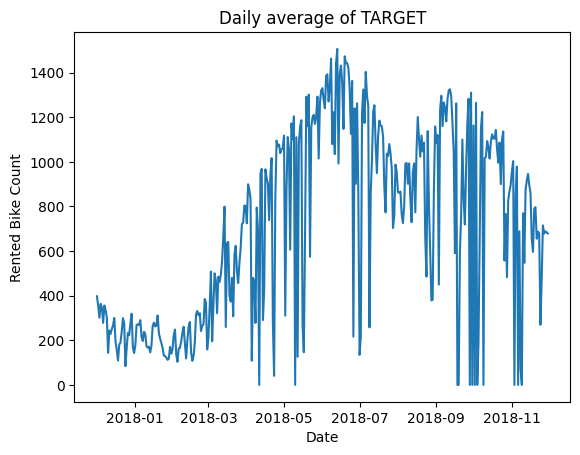

In [49]:
tmp_df = df.groupby("Date").agg({TARGET:"mean"})
sns.lineplot(x=tmp_df.index, y=tmp_df[TARGET])
plt.title("Daily average of TARGET")
plt.show()

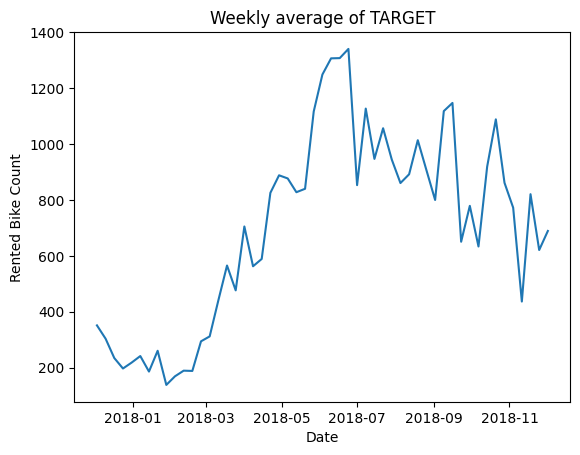

In [50]:
tmp_df = df.groupby("Date").agg({TARGET:"mean"}).resample('W').mean()
sns.lineplot(x=tmp_df.index, y=tmp_df[TARGET])
plt.title("Weekly average of TARGET")
plt.show()

,Rented Bike Count
Date,
2017-12-31,249.099462
2018-01-31,201.620968
2018-02-28,225.941964
2018-03-31,511.551075
2018-04-30,728.093056
2018-05-31,950.387097
2018-06-30,1245.676389
2018-07-31,987.177419
2018-08-31,876.192204


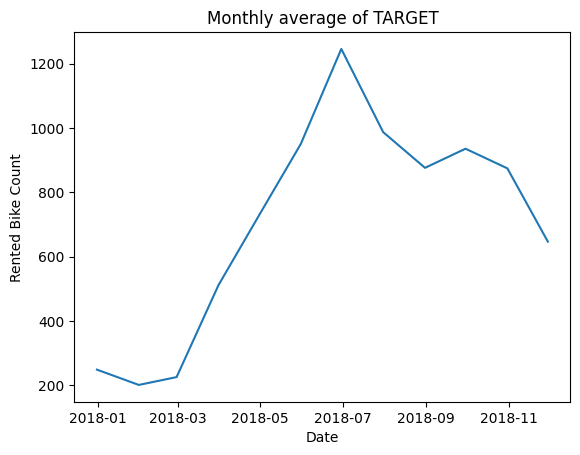

In [51]:
tmp_df = df.groupby("Date").agg({TARGET:"mean"}).resample('M').mean()
display(tmp_df)
sns.lineplot(x=tmp_df.index, y=tmp_df[TARGET])
plt.title("Monthly average of TARGET")
plt.show()

### There are many rentals in June.

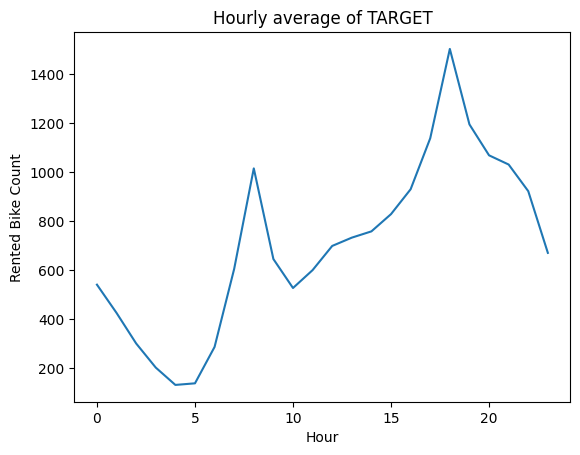

In [52]:
tmp_df = df.groupby("Hour").agg({TARGET:"mean"})
sns.lineplot(x=tmp_df.index, y=tmp_df[TARGET])
plt.title("Hourly average of TARGET")
plt.show()

### Demand peaks at 9am and 6pm. It is thought to be used for commuting to work or school.

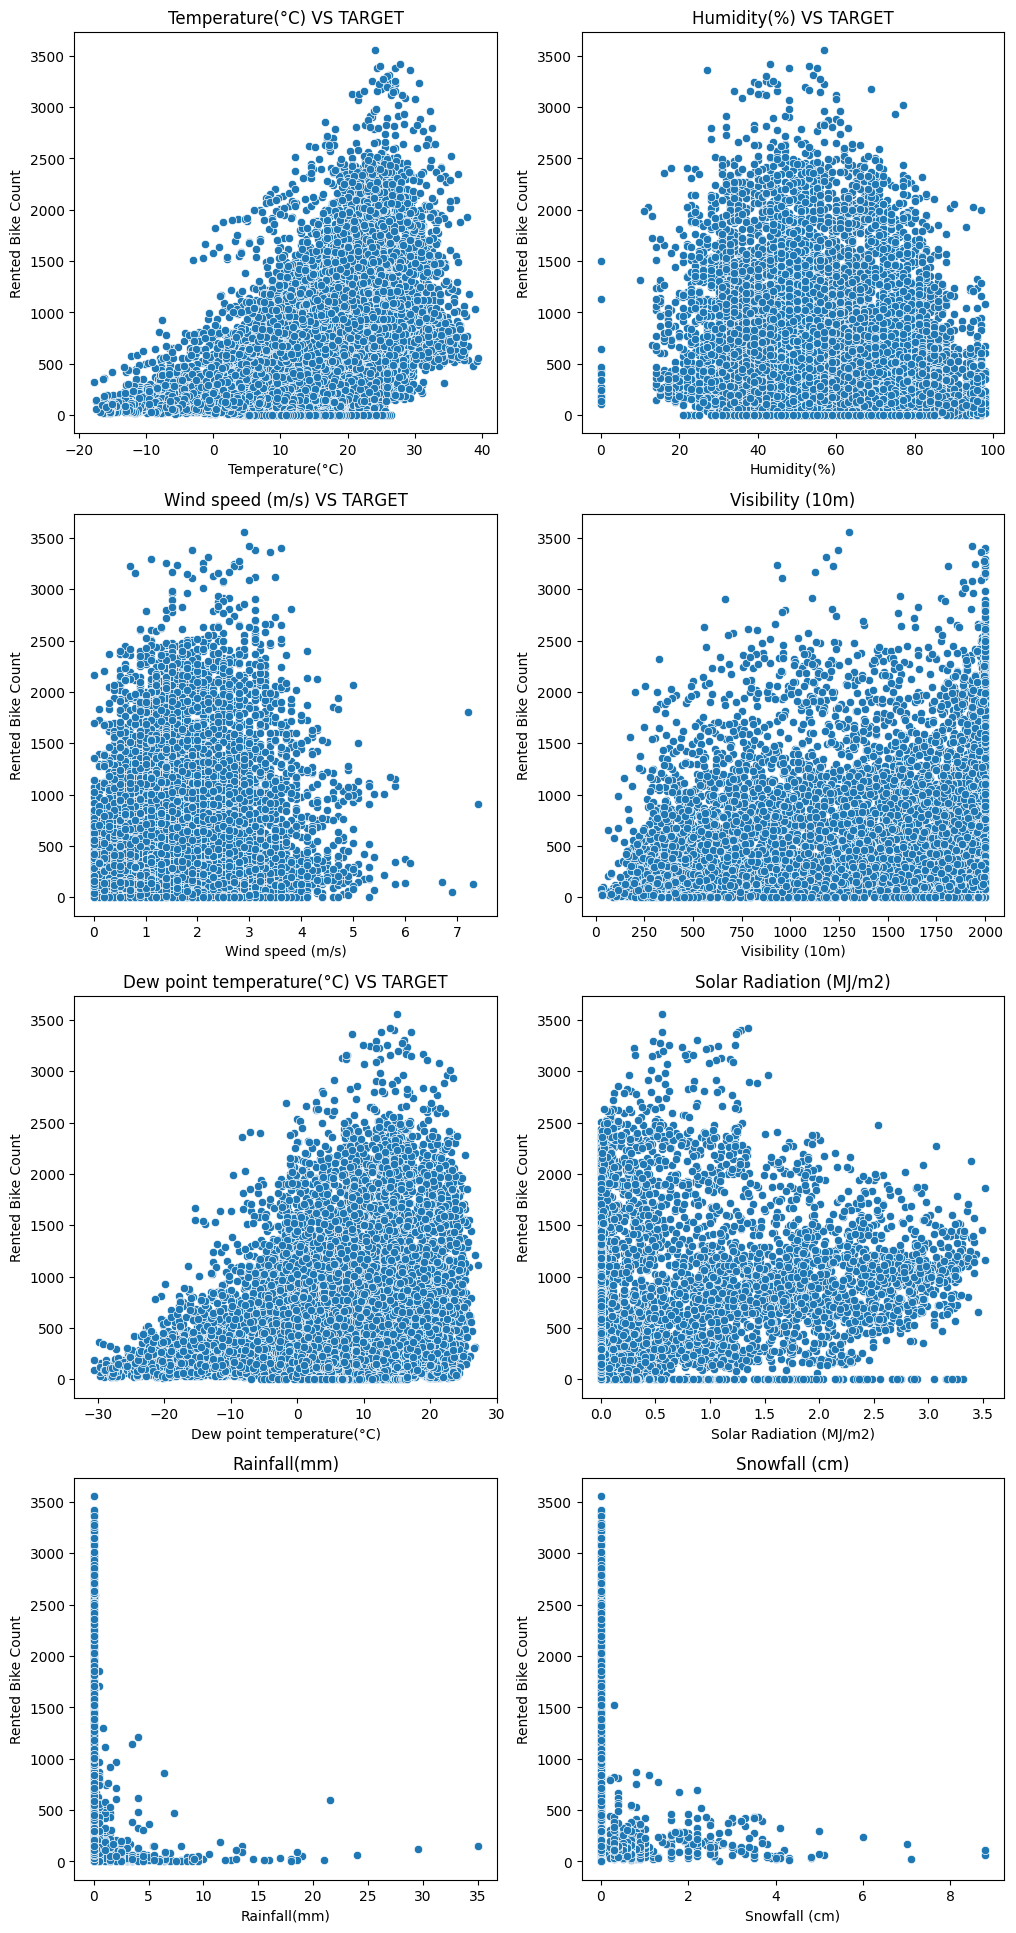

In [53]:
plt.figure(figsize=(12,24))

plt.subplot(421)
sns.scatterplot(x=df["Temperature(°C)"],y=df[TARGET])
plt.title("Temperature(°C) VS TARGET")

plt.subplot(422)
sns.scatterplot(x=df["Humidity(%)"],y=df[TARGET])
plt.title("Humidity(%) VS TARGET")

plt.subplot(423)
sns.scatterplot(x=df["Wind speed (m/s)"],y=df[TARGET])
plt.title("Wind speed (m/s) VS TARGET")

plt.subplot(424)
sns.scatterplot(x=df["Visibility (10m)"],y=df[TARGET])
plt.title("Visibility (10m)")

plt.subplot(425)
sns.scatterplot(x=df["Dew point temperature(°C)"],y=df[TARGET])
plt.title("Dew point temperature(°C) VS TARGET")

plt.subplot(426)
sns.scatterplot(x=df["Solar Radiation (MJ/m2)"],y=df[TARGET])
plt.title("Solar Radiation (MJ/m2)")

plt.subplot(427)
sns.scatterplot(x=df["Rainfall(mm)"],y=df[TARGET])
plt.title("Rainfall(mm)")

plt.subplot(428)
sns.scatterplot(x=df["Snowfall (cm)"],y=df[TARGET])
plt.title("Snowfall (cm)")

plt.show()

### See the difference when rain and snow are other than 0

In [63]:
df_0 = df[((df["Rainfall(mm)"]==0)&((df["Rainfall(mm)"]==0)))]
df_not_0 = df[~((df["Rainfall(mm)"]==0)&((df["Rainfall(mm)"]==0)))]

print(f"Maen:{df_0[TARGET].mean()}")
print(f"Median:{df_0[TARGET].median()}")
print(f"Std:{df_0[TARGET].std()}")

print()

print(f"Maen:{df_not_0[TARGET].mean()}")
print(f"Median:{df_not_0[TARGET].median()}")
print(f"Std:{df_not_0[TARGET].std()}")

Maen:739.3111030126337
Median:562.0
Std:646.7776993137827

Maen:163.4564393939394
Median:67.0
Std:262.0709197513688


## It seems that the number of users decreases considerably when the rain or snow is other than 0.

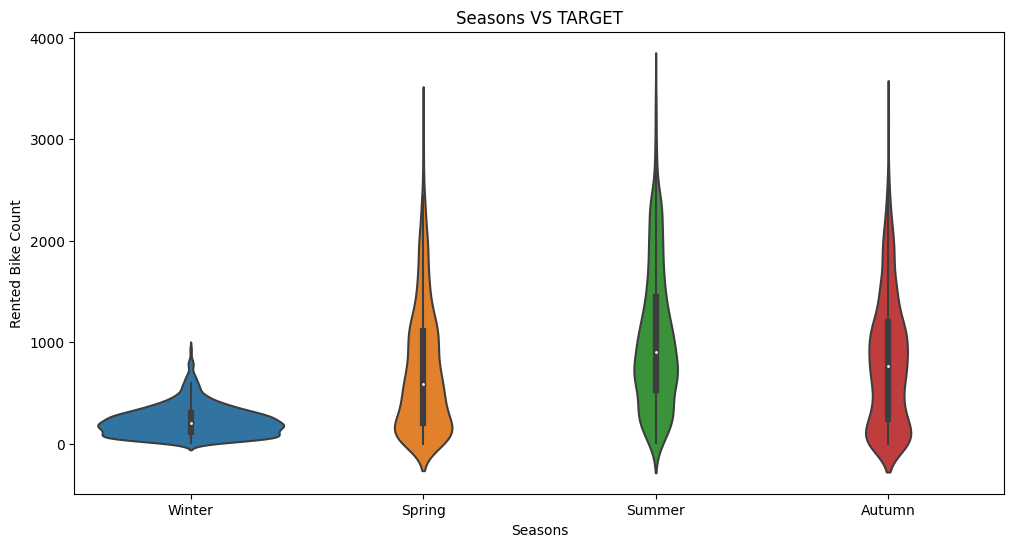

In [54]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df["Seasons"],y=df[TARGET])
plt.title("Seasons VS TARGET")
plt.show()

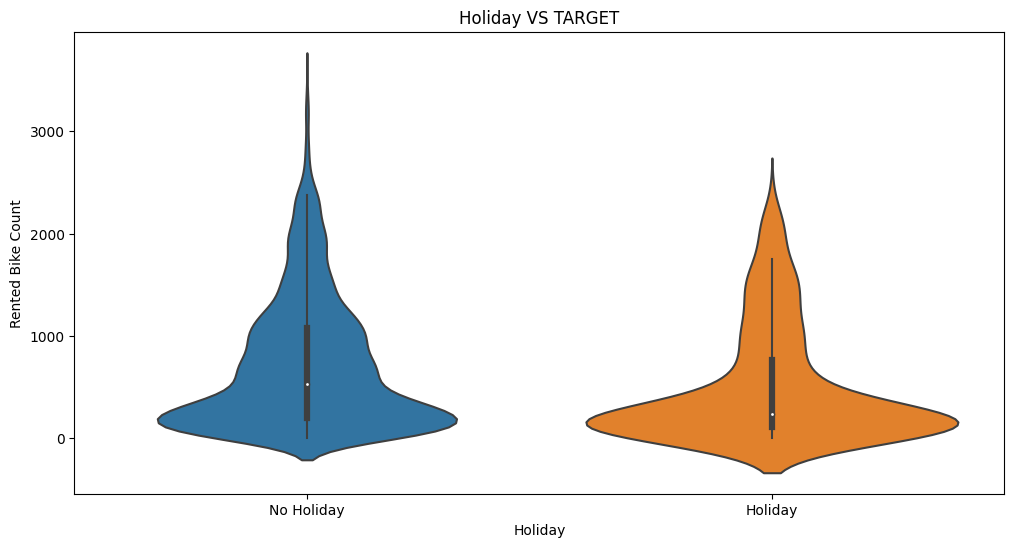

In [55]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df["Holiday"],y=df[TARGET])
plt.title("Holiday VS TARGET")
plt.show()

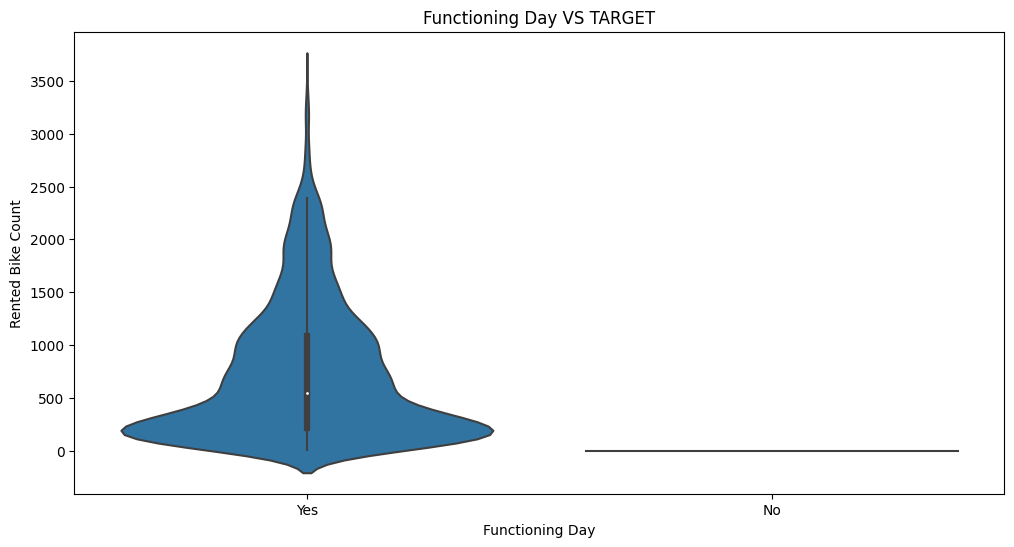

In [56]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df["Functioning Day"],y=df[TARGET])
plt.title("Functioning Day VS TARGET")
plt.show()

### Users use bicycles for commuting to work and school, so there are few users on holidays.

In [57]:
df["month"] = df["Date"].dt.month

### TARGET is larger in June than before and after that, and TARGET is smaller in August than before and after that.
### Let's consider the characteristics of May to September.

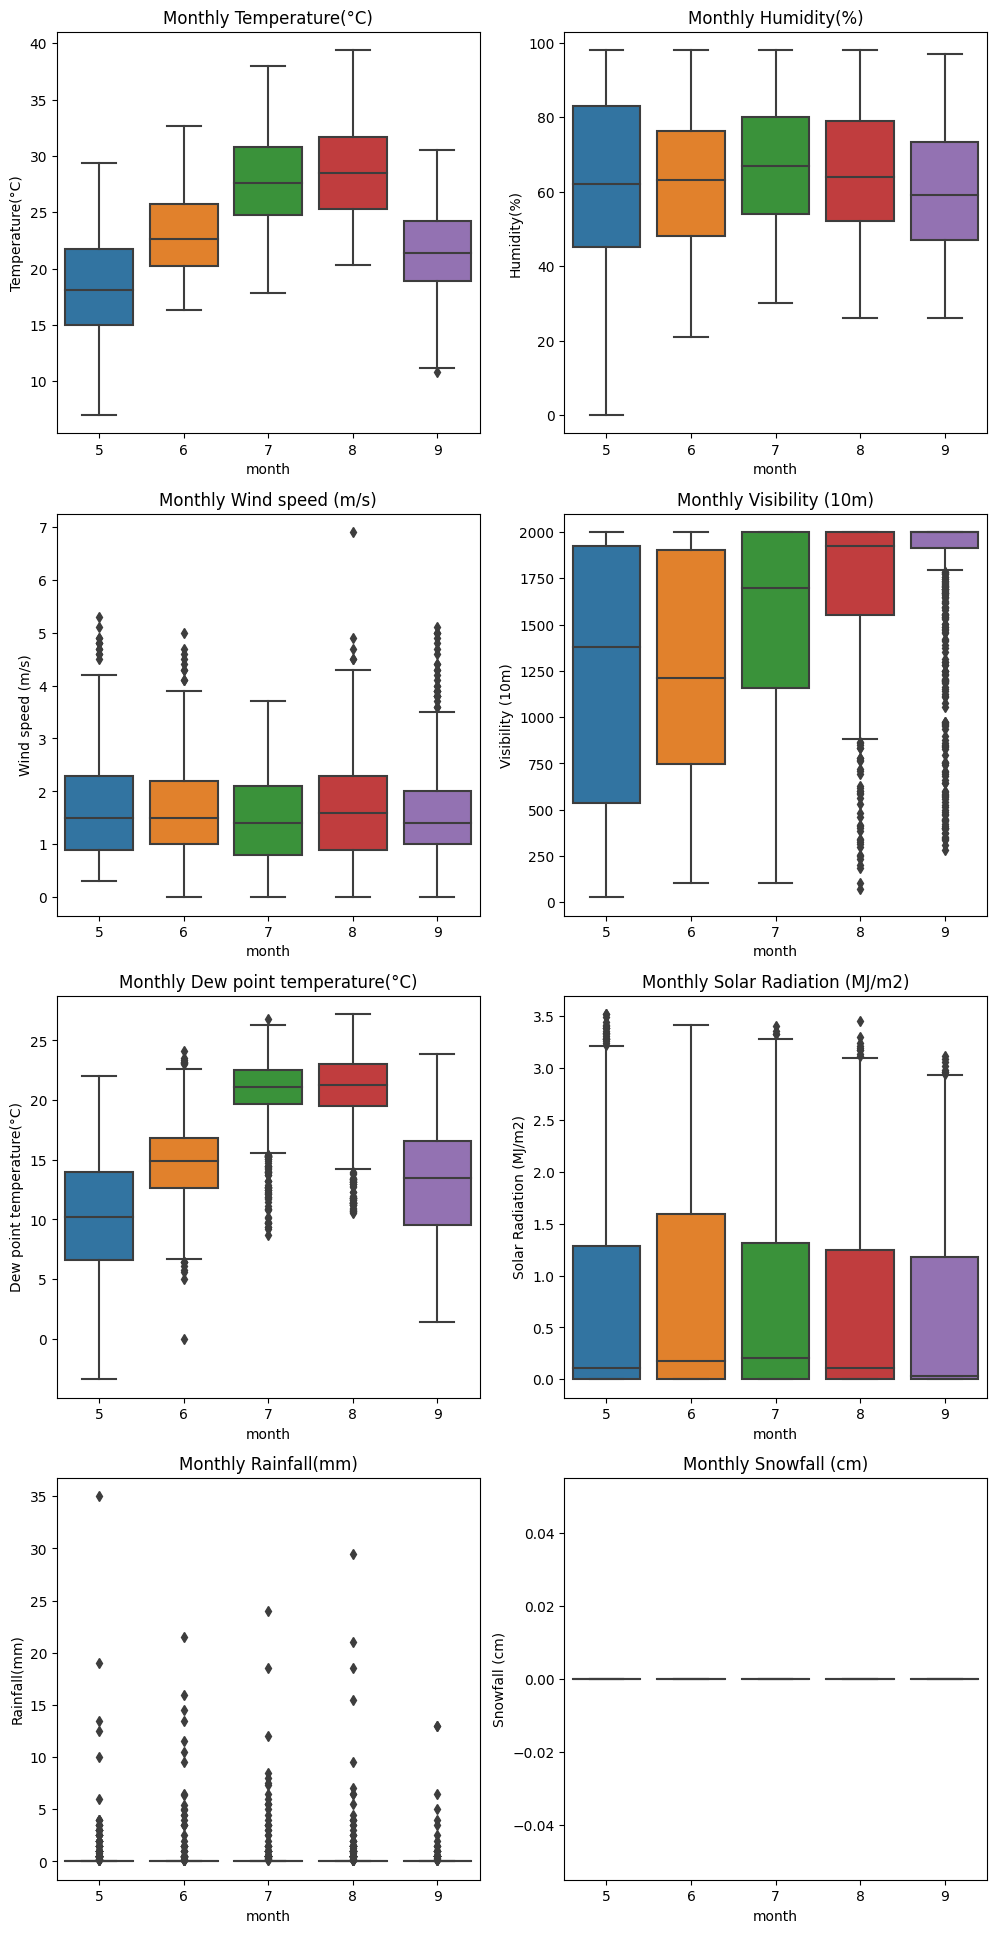

In [58]:
plt.figure(figsize=(12,24))

plt.subplot(421)
sns.boxplot(x=df[(df["month"]>=5)&(df["month"]<=9)]["month"],y=df["Temperature(°C)"])
plt.title("Monthly Temperature(°C)")

plt.subplot(422)
sns.boxplot(x=df[(df["month"]>=5)&(df["month"]<=9)]["month"],y=df["Humidity(%)"])
plt.title("Monthly Humidity(%)")

plt.subplot(423)
sns.boxplot(x=df[(df["month"]>=5)&(df["month"]<=9)]["month"],y=df["Wind speed (m/s)"])
plt.title("Monthly Wind speed (m/s)")

plt.subplot(424)
sns.boxplot(x=df[(df["month"]>=5)&(df["month"]<=9)]["month"],y=df["Visibility (10m)"])
plt.title("Monthly Visibility (10m)")

plt.subplot(425)
sns.boxplot(x=df[(df["month"]>=5)&(df["month"]<=9)]["month"],y=df["Dew point temperature(°C)"])
plt.title("Monthly Dew point temperature(°C)")

plt.subplot(426)
sns.boxplot(x=df[(df["month"]>=5)&(df["month"]<=9)]["month"],y=df["Solar Radiation (MJ/m2)"])
plt.title("Monthly Solar Radiation (MJ/m2)")

plt.subplot(427)
sns.boxplot(x=df[(df["month"]>=5)&(df["month"]<=9)]["month"],y=df["Rainfall(mm)"])
plt.title("Monthly Rainfall(mm)")

plt.subplot(428)
sns.boxplot(x=df[(df["month"]>=5)&(df["month"]<=9)]["month"],y=df["Snowfall (cm)"])
plt.title("Monthly Snowfall (cm)")

plt.show()

<Axes: xlabel='month', ylabel='Holiday'>

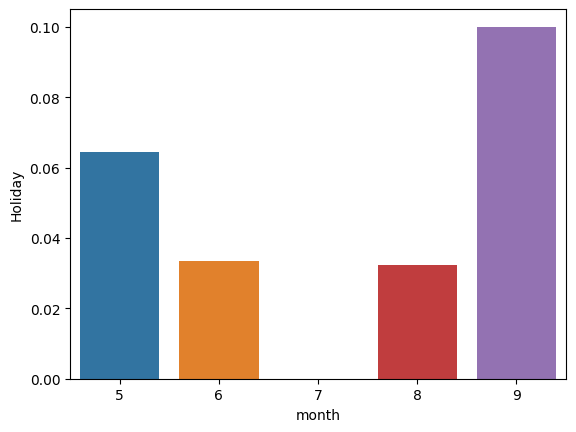

In [59]:
tmp_df = df[(df["month"]>=5)&(df["month"]<=9)]
tmp_df["Holiday"] = tmp_df["Holiday"].map({"No Holiday":0,"Holiday":1})
tmp_df = tmp_df.groupby("month").agg({"Holiday":"mean"})
sns.barplot(x=tmp_df.index, y=tmp_df["Holiday"])

# Conclusion

## 1.There are many users at 9:00 and 18:00, so they are probably using it for commuting to work or school.
## 2.Although there were many users in June, the difference could not be seen by simple visualization.It might be a good idea to consider how much of a difference there is based on June.
## 3.When there is no rain or snow, there are very few users.